In [18]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from keras import datasets, layers, models

print(tf.__version__)

2.11.0


In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

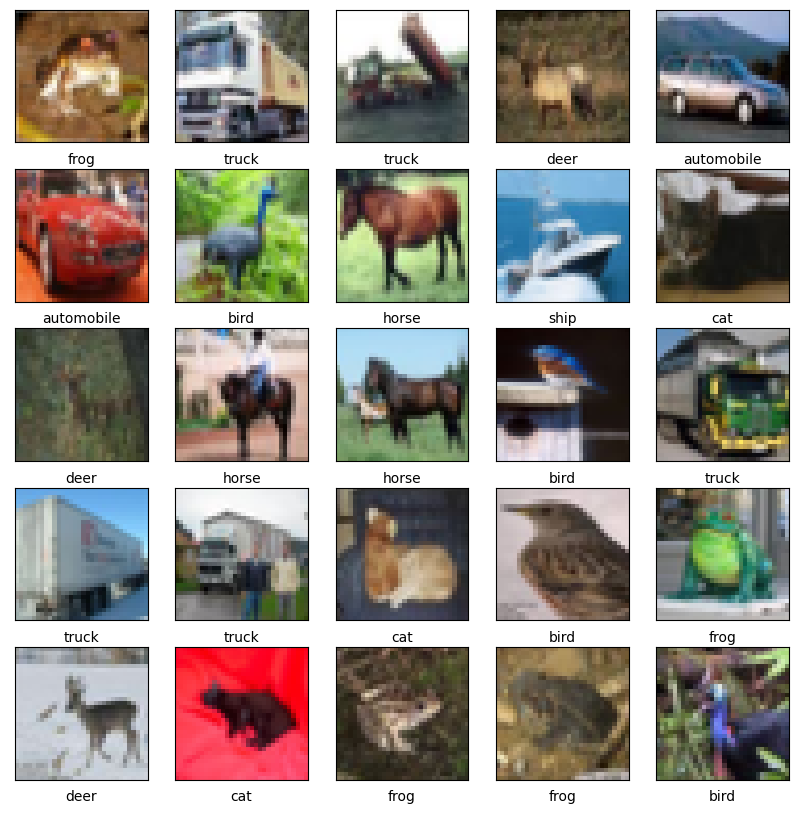

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5444 - accuracy: 0.8087 - val_loss: 0.8901 - val_accuracy: 0.7099
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5108 - accuracy: 0.8216 - val_loss: 0.9165 - val_accuracy: 0.7107
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4823 - accuracy: 0.8300 - val_loss: 0.9166 - val_accuracy: 0.7157
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4465 - accuracy: 0.8423 - val_loss: 0.9316 - val_accuracy: 0.7188
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4139 - accuracy: 0.8541 - val_loss: 0.9614 - val_accuracy: 0.7108
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3926 - accuracy: 0.8609 - val_loss: 0.9754 - val_accuracy: 0.7174
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3657 - accuracy: 0.8691 - val_loss: 1.0807 -

313/313 - 1s - loss: 1.1696 - accuracy: 0.7068 - 1s/epoch - 4ms/step


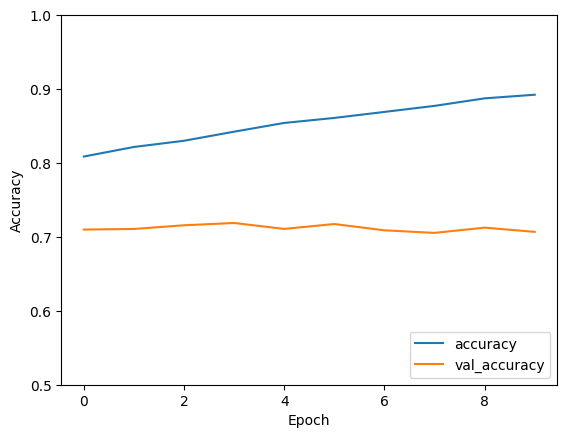

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

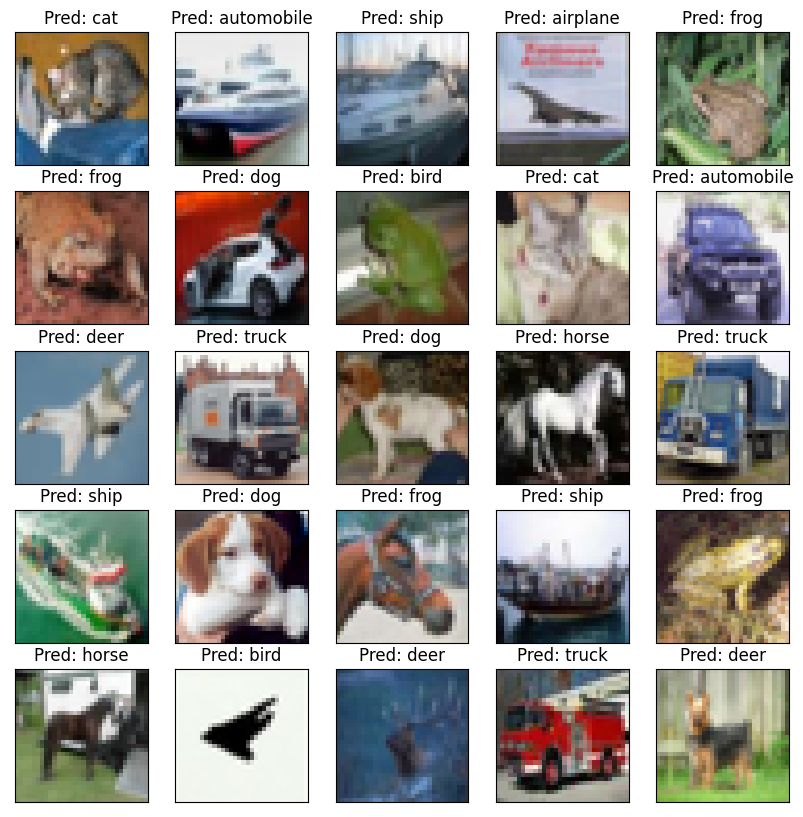

In [41]:
plt.figure(figsize=(10,10))

for i in range(25):
    classifications = model(test_images)

    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.argmax(classifications[i])
    plt.title("Pred: " + class_names[index])

In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmph32c_xpe/assets


INFO:tensorflow:Assets written to: /tmp/tmph32c_xpe/assets
2023-01-14 16:12:42.957273: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-14 16:12:42.957306: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-14 16:12:42.959431: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmph32c_xpe
2023-01-14 16:12:42.961486: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-01-14 16:12:42.961523: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmph32c_xpe
2023-01-14 16:12:42.966629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-01-14 16:12:42.968248: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-14 16:12:43.027162: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio